📊 Desafio 48 — Análise de Resposta a Campanha Publicitária

📂 Dataset: dia_48_resposta_campanha.csv

Este conjunto de dados representa clientes de uma loja virtual, incluindo informações demográficas, categoria de interesse e se responderam ou não a uma campanha de marketing.

🔍 Tarefas:

Qual a taxa geral de resposta à campanha?

Existe diferença de resposta entre os gêneros?

A faixa etária influencia na resposta? Gere um gráfico de barras agrupando por faixas etárias.

Clientes que gastam mais mensalmente tendem a responder mais à campanha?

Qual a categoria de produto com maior taxa de resposta?

Faça um gráfico (por exemplo, countplot ou barplot) relacionando categoria preferida e taxa de resposta.

Treine um modelo simples de classificação (ex: LogisticRegression) para prever quem responderá à campanha com base nas variáveis fornecidas.

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [123]:
df = pd.read_csv("dia_48_resposta_campanha.csv")
df.head()

,id_cliente,genero,idade,categoria_preferida,gasto_mensal,respondeu_campanha
0,1,Feminino,29,Roupas,518.10,Sim
1,2,Outro,34,Roupas,683.08,Sim
2,3,Feminino,48,Roupas,814.23,Não
3,4,Feminino,33,Eletrônicos,479.79,Não
4,5,Masculino,32,Alimentos,147.37,Não


In [115]:
#Qual a taxa geral de resposta à campanha?
taxaRespostaCampanha = df["respondeu_campanha"].value_counts(normalize=True) * 100
print(taxaRespostaCampanha)

respondeu_campanha
Não    69.2
Sim    30.8
Name: proportion, dtype: float64


In [116]:
#Existe diferença de resposta entre os gêneros?
respostaGeneros = df.groupby("genero")["respondeu_campanha"].value_counts().unstack()
print(respostaGeneros)

respondeu_campanha  Não  Sim
genero                      
Feminino             81   38
Masculino            69   31
Outro                23    8


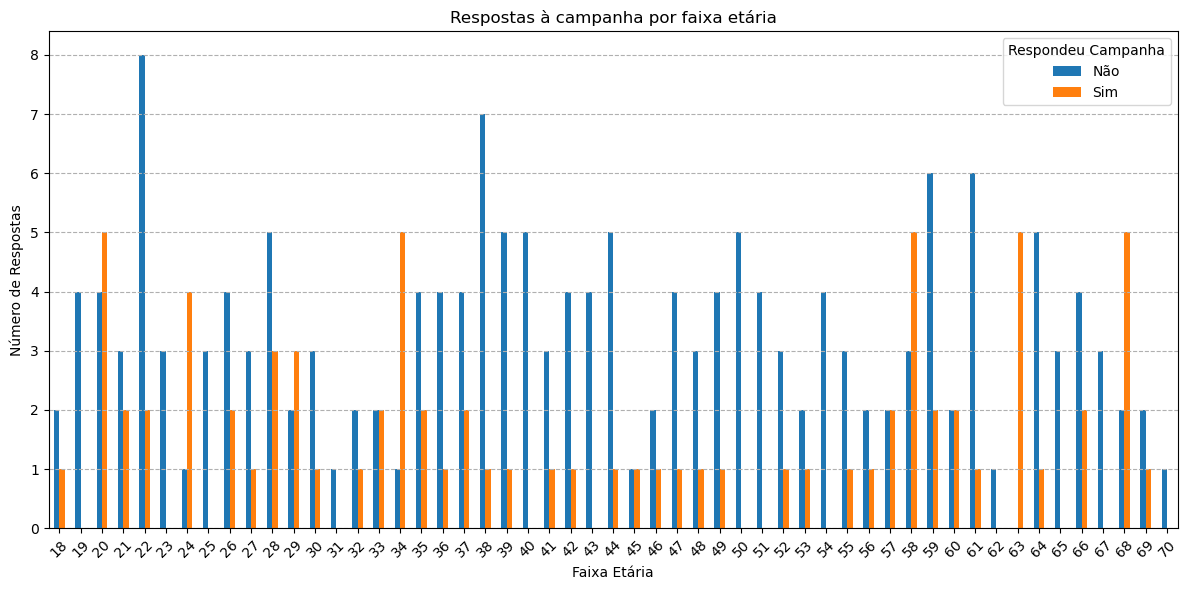

In [117]:
#A faixa etária influencia na resposta? Gere um gráfico de barras agrupando por faixas etárias.
respostaFaixa = df.groupby(['idade', 'respondeu_campanha']).size().unstack().fillna(0)

respostaFaixa.plot(kind="bar", figsize=(12,6))
plt.title("Respostas à campanha por faixa etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Respostas")
plt.legend(title="Respondeu Campanha")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()

In [118]:
#Clientes que gastam mais mensalmente tendem a responder mais à campanha?
mediaGastoResposta = df.groupby("respondeu_campanha")["gasto_mensal"].mean().round(2)
print(mediaGastoResposta)

respondeu_campanha
Não     986.88
Sim    1047.01
Name: gasto_mensal, dtype: float64


In [119]:
#Qual a categoria de produto com maior taxa de resposta?
categoriaTaxaResposta = df.groupby("categoria_preferida")["respondeu_campanha"].value_counts(normalize=True).unstack().round(2).sort_values(by="Não") * 100
print(categoriaTaxaResposta)

respondeu_campanha    Não   Sim
categoria_preferida            
Esportes             59.0  41.0
Eletrônicos          69.0  31.0
Livros               69.0  31.0
Alimentos            70.0  30.0
Roupas               70.0  30.0
Beleza               81.0  19.0


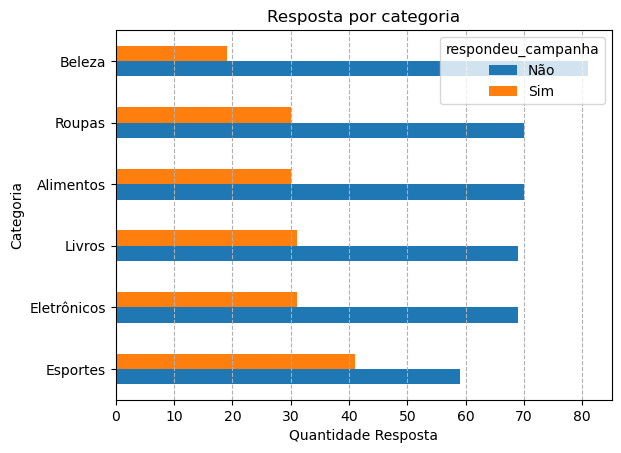

In [120]:
#Faça um gráfico (por exemplo, countplot ou barplot) relacionando categoria preferida e taxa de resposta.
df['respondeu_campanha'] = df['respondeu_campanha'].map({'Sim': 1, 'Não': 0})
categoriaTaxaResposta.plot(kind="barh")
plt.title("Resposta por categoria")
plt.ylabel("Categoria")
plt.xlabel("Quantidade Resposta")
plt.grid(axis="x", linestyle="--")
plt.show()

In [130]:
#Treine um modelo simples de classificação (ex: LogisticRegression) para prever quem responderá à campanha com base nas variáveis fornecidas.
let_res = LabelEncoder()
le_cat = LabelEncoder()
le_gen = LabelEncoder()

df["respondeu_campanha"] = let_res.fit_transform(df["respondeu_campanha"])
df["categoria_preferida"] = le_cat.fit_transform(df["categoria_preferida"])
df["genero"] = le_gen.fit_transform(df["genero"])

X = df.drop("respondeu_campanha", axis=1)
y = df["respondeu_campanha"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, zero_division=0))

Acurácia: 0.6933333333333334
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        52
           1       0.00      0.00      0.00        23

    accuracy                           0.69        75
   macro avg       0.35      0.50      0.41        75
weighted avg       0.48      0.69      0.57        75

